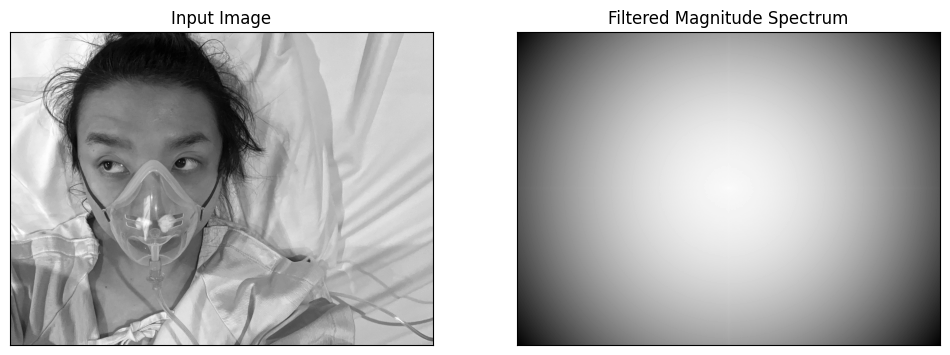

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def make_gaussian_mask(img_shape, sigma):
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros((height, width))

    for y in range(height):
        for x in range(width):
            # 中心からの距離の2乗
            distance_sq = (x - c_x) ** 2 + (y - c_y) ** 2
            # ガウシアン式による計算
            mask[y, x] = np.exp(-distance_sq / (2 * sigma ** 2))

    return mask

def plot_gaussian_filtered_fft(image_path, sigma):
    """画像のフーリエ変換にガウシアンフィルタを適用し、結果を表示する関数。"""
    # 画像をグレースケールで読み込む
    img = cv2.imread(image_path, 0)
    if img is None:
        raise ValueError("Image not found or path is incorrect")

    # 画像の2次元フーリエ変換を実行
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # ガウシアンマスクを作成し、フーリエ変換結果に適用
    gaussian_mask = make_gaussian_mask(img.shape, sigma)
    fshift_filtered = fshift * gaussian_mask

    # 振幅スペクトルを対数スケールで取得
    magnitude_spectrum_filtered = 20 * np.log(np.abs(fshift_filtered))

    # 結果をプロット
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum_filtered, cmap='gray')
    plt.title('Filtered Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

# 使用例
image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/kadai3/F_D2gAXX0AAqTXr.jpeg'
plot_gaussian_filtered_fft(image_path, sigma=50)


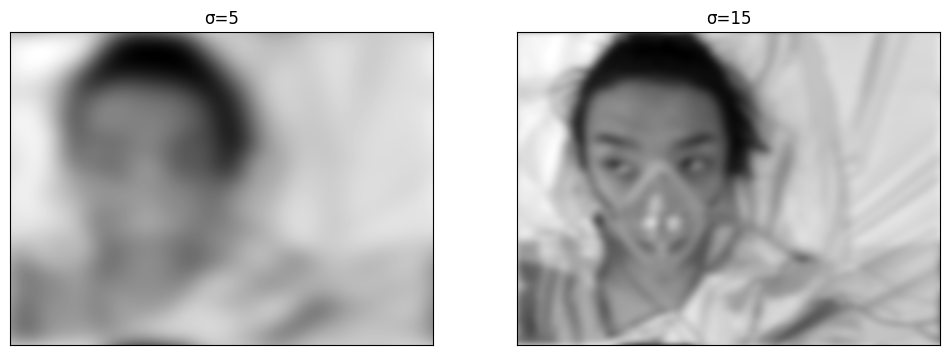

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 1. ガウシアンマスクを生成する関数
def make_gaussian_mask(img_shape, sigma):
    """ガウシアンフィルタ型のマスクを作成する関数。forループを使用。"""
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros(img_shape)

    for y in range(height):
        for x in range(width):
            # 中心からの距離の2乗
            distance_sq = (x - c_x) ** 2 + (y - c_y) ** 2
            # ガウシアン式による計算
            mask[y, x] = np.exp(-distance_sq / (2 * sigma ** 2))

    return mask

# 2. 特定のシグマ値で画像にガウシアンフィルタを適用する関数
def apply_gaussian_filter(img, sigma):
    gaussian_mask = make_gaussian_mask(img.shape, sigma)
    fshift = np.fft.fftshift(np.fft.fft2(img))
    fshift_filtered = fshift * gaussian_mask
    img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
    return np.abs(img_filtered)

# 3. 異なるシグマ値でフィルタリングされた画像を表示する関数
def plot_gaussian_filtered_images(image_path, sigma_values):
    img = cv2.imread(image_path, 0)
    if img is None:
        raise ValueError("Image not found or path is incorrect")
    plt.figure(figsize=(12, 6))
    for i, sigma in enumerate(sigma_values, 1):
        filtered_img = apply_gaussian_filter(img, sigma)
        plt.subplot(1, len(sigma_values), i)
        plt.imshow(filtered_img, cmap='gray')
        plt.title(f'σ={sigma}')
        plt.xticks([]), plt.yticks([])
    plt.show()

# 使用例
image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/kadai3/F_D2gAXX0AAqTXr.jpeg'
sigma_values = [5, 15]
plot_gaussian_filtered_images(image_path, sigma_values)


/var/folders/7w/4xfp0lk95z523t6v8pvy_lcm0000gn/T/ipykernel_44071/2817488948.py:15: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_filtered1 = 20 * np.log(np.abs(fshift_filtered1))


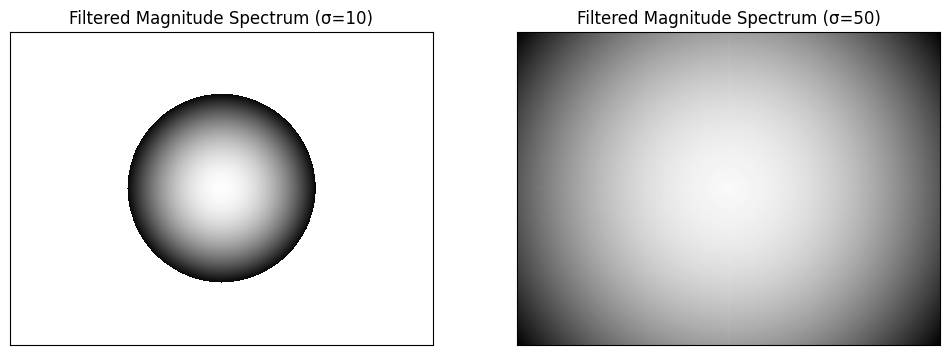

In [11]:
def plot_two_gaussian_filtered_ffts(image_path, sigma1, sigma2):
    # 画像をグレースケールで読み込む
    img = cv2.imread(image_path, 0)
    if img is None:
        raise ValueError("Image not found or path is incorrect")

    # 画像の2次元フーリエ変換を実行
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # シグマ値1のガウシアンマスクを作成し、フーリエ変換結果に適用
    gaussian_mask1 = make_gaussian_mask(img.shape, sigma1)
    fshift_filtered1 = fshift * gaussian_mask1
    magnitude_spectrum_filtered1 = 20 * np.log(np.abs(fshift_filtered1))

    # シグマ値2のガウシアンマスクを作成し、フーリエ変換結果に適用
    gaussian_mask2 = make_gaussian_mask(img.shape, sigma2)
    fshift_filtered2 = fshift * gaussian_mask2
    magnitude_spectrum_filtered2 = 20 * np.log(np.abs(fshift_filtered2))

    # 結果をプロット
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(magnitude_spectrum_filtered1, cmap='gray')
    plt.title(f'Filtered Magnitude Spectrum (σ={sigma1})'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum_filtered2, cmap='gray')
    plt.title(f'Filtered Magnitude Spectrum (σ={sigma2})'), plt.xticks([]), plt.yticks([])
    plt.show()

# 使用例
image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/kadai3/F_D2gAXX0AAqTXr.jpeg'
plot_two_gaussian_filtered_ffts(image_path, sigma1=10, sigma2=50)


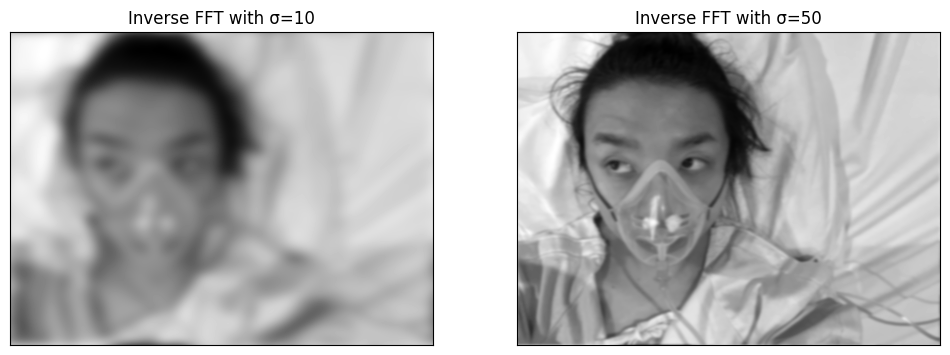

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 1. ガウシアンマスクを生成する関数
def make_gaussian_mask(img_shape, sigma):
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            distance_sq = (x - c_x) ** 2 + (y - c_y) ** 2
            mask[y, x] = np.exp(-distance_sq / (2 * sigma ** 2))
    return mask

# 2. 画像にガウシアンフィルタを適用する関数
def apply_gaussian_filter_to_fft(fshift, sigma, img_shape):
    gaussian_mask = make_gaussian_mask(img_shape, sigma)
    return fshift * gaussian_mask

# 3. 逆フーリエ変換を行う関数
def inverse_fft(fshift_filtered):
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
    return np.abs(img_back)

# 4. 結果を表示する関数
def plot_filtered_images(image_path, sigma_values):
    img = cv2.imread(image_path, 0)
    if img is None:
        raise ValueError("Image not found or path is incorrect")
    fshift = np.fft.fftshift(np.fft.fft2(img))

    plt.figure(figsize=(12, len(sigma_values) * 6))
    for i, sigma in enumerate(sigma_values, 1):
        fshift_filtered = apply_gaussian_filter_to_fft(fshift, sigma, img.shape)
        img_back = inverse_fft(fshift_filtered)

        plt.subplot(1, len(sigma_values), i)
        plt.imshow(img_back, cmap='gray')
        plt.title(f'Inverse FFT with σ={sigma}')
        plt.xticks([]), plt.yticks([])
    plt.show()

# 使用例
image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/kadai3/F_D2gAXX0AAqTXr.jpeg'
sigma_values = [10, 50]
plot_filtered_images(image_path, sigma_values)


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def make_gaussian_mask(img_shape, sigma):
    height, width = img_shape
    c_x, c_y = width // 2, height // 2
    mask = np.zeros((height, width))

    for y in range(height):
        for x in range(width):
            distance_sq = (x - c_x) ** 2 + (y - c_y) ** 2
            mask[y, x] = np.exp(-distance_sq / (2 * sigma ** 2))

    return mask

def plot_gaussian_filtered_fft(image_path):
    img = cv2.imread(image_path, 0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    gaussian_mask = make_gaussian_mask(img.shape, 50)
    fshift_filtered = fshift * gaussian_mask
    magnitude_spectrum_filtered_sigma50=  np.log(np.abs(fshift_filtered))
    gaussian_mask = make_gaussian_mask(img.shape, 10)
    fshift_filtered = fshift * gaussian_mask
    magnitude_spectrum_filtered_sigma10=  np.log(np.abs(fshift_filtered))

    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(magnitude_spectrum_filtered_sigma10, cmap='gray')
    plt.title('Filtered Magnitude Spectrum sigma=10'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(magnitude_spectrum_filtered_sigma50, cmap='gray')
    plt.title('Filtered Magnitude Spectrum sigma=50'), plt.xticks([]), plt.yticks([])
    plt.show()

# 使用例
image_path = '/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/blurred_ochi20.jpg'  # 画像のパスを指定
plot_gaussian_filtered_fft(image_path)


[ WARN:0@0.235] global loadsave.cpp:248 findDecoder imread_('/Users/hanya/Documents/UU/3rd/late/optplo/kadai2/blurred_ochi20.jpg'): can't open/read file: check file path/integrity


IndexError: cannot do a non-empty take from an empty axes.